<a href="https://colab.research.google.com/github/caalr11/FisicaComputacional1/blob/master/Actividad10/Actividad10_Arias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACTIVIDAD 10

CARLOS ANDRES ARIAS LOPEZ REYES


Ejercicio 1:
Resuelva la Ecuación del calor

A)
Una barra metálica de longitud $L=10$, y coeficiente de difusión $\kappa=100$. Condición inicial: $u(x,0) = 0$.

Condiciones: $u(0,t)=10$, $u(L,t)=0$.

Realice los cálculos hasta alcanzar el equilibrio térmico.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

dt/dx^2 < 0.5? 0.004514757378689345


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: The following kwargs were not used by contour: 'lw'


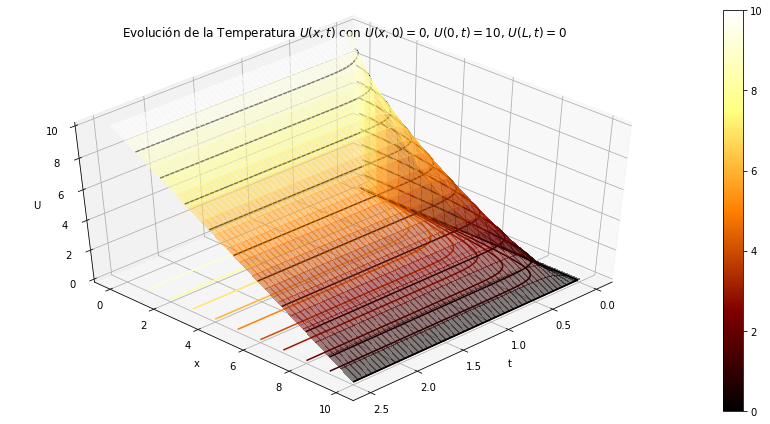

In [26]:
#INCISO A
#variables
X = 20   
T = 2000 
x0 = 0
xL = 10 #Largo de la barra
t0 = 0
tF = 2.5 
dx = ( xL - x0 )/( X - 1 )
dt = ( tF - t0 )/( T - 1 )
print( "dt/dx^2 < 0.5?", dt/dx**2 )
k = 100.0
α = k*dt/dx**2

xstep = np.linspace( x0, xL, X ) 
tstep = np.linspace( t0, tF, T )

U = np.zeros( ( X, T ) )

U[:,0] = 0 

U[ 0, : ] = 10  
U[ -1, : ] = 0

#Ecuacion del Calor

for j in range( 0, T - 1 ):
    for i in range( 1, X - 1 ):
        U[ i, j+1 ] = α*U[ i - 1, j ] + ( 1 - 2*α )*U[ i, j ] + α*U[ i + 1, j ]


Temp, Xray = np.meshgrid( tstep, xstep ) 
fig = plt.figure( figsize = ( 12, 6 ) )
ax = fig.gca( projection = "3d" )
surf = ax.plot_surface( Temp, Xray, U, cmap = "afmhot", 
                       linewidth = 0.01, antialiased = False, alpha = 0.5)
ax.contour( Temp, Xray, U, 10, lw = 1, colors = "k", linestyles = "solid" )
ax.contour( Temp, Xray, U, 10, lw = 1, cmap = "afmhot", 
           linestyles = "solid", offset = 0 )
m = cm.ScalarMappable( cmap = "afmhot" )
m.set_array( U )
plt.colorbar( m )
ax.set_xlabel( "t" )
ax.set_ylabel( "x" )
ax.set_zlabel( "U" )
ax.set_title( "Evolución de la Temperatura $U(x,t)$ con $U(x,0)=0$, $U(0,t)=10$, $U(L,t)=0$" )
ax.view_init( elev = 45, azim = 45 )
plt.tight_layout()
plt.show()

Inciso B)

Un material de longitud $L=10$ con coeficiente de difusión térmica $\kappa=0.25$

Condición inicial $u(x,0)=20$.

Condiciones a la frontera: $u(0,t)=(20 + 10 sin(\pi t/12)$, $u(L,t)=20$.

Realice los cálculos para $t=(0,48)$

Pueden ajustar los parámetros para ver cómo cambia la temperatura dentro del cuerpo.

dt/dx**2 < 0.5? 0.01155277018467898


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by contour: 'lw'


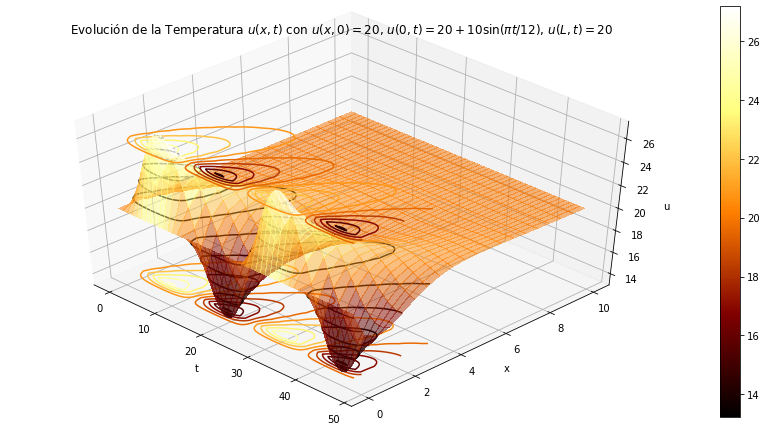

In [27]:
#INCISO B
X = 20
T  = 15000
x0 = 0
xL = 10
t0 = 0
tF = 48
dx = ( xL - x0 )/( X - 1 )
dt = ( tF - t0 )/( T - 1 )
print( "dt/dx**2 < 0.5?", dt/dx**2)
k = 0.25
α = k*dt/dx**2
xstep = np.linspace( x0, xL, X )
tstep = np.linspace( t0, tF, T )
U = np.zeros( ( X, T ) )
U[:,0] = 20.0 

for j in range(0, T-1): 
    t = j*dt
    U[ 0, : ] = 20 + 10*np.sin(np.pi*t/12.0) 
    U[ -1, : ] = 20.0
    for i in range( 1, X - 1 ):
        U[ i, j + 1 ] = α*U[ i - 1, j ] + ( 1 - 2*α)*U[ i, j ] + α*U[ i + 1, j ]

Temp, Xray = np.meshgrid( tstep, xstep )
fig = plt.figure( figsize = ( 12, 6 ) )
ax = fig.gca( projection = "3d")
surf = ax.plot_surface( Temp, Xray, U, cmap = "afmhot",
                       linewidth = 0.01, antialiased = False, alpha = 0.5 )
ax.contour( Temp, Xray, U, 10, lw = 1, colors = "k", linestyles = "solid" )
ax.contour( Temp, Xray, U, 10, lw = 1, cmap = "afmhot", 
           linestyles = "solid", offset = 14)
ax.contour( Temp, Xray, U, 10, lw = 1, cmap = "afmhot", 
           linestyles = "solid", offset = 26)
m = cm.ScalarMappable( cmap = "afmhot" )
m.set_array( U )
plt.colorbar( m )
ax.set_xlabel( "t" )
ax.set_ylabel( "x" )
ax.set_zlabel( "u" )
ax.set_title( "Evolución de la Temperatura $u(x,t)$ con $u(x,0)=20$, $u(0,t)=20+10\sin(\pi t/12)$, $u(L,t)=20$ ")
ax.view_init( elev = 45, azim = -45 ) # Punto del observador 
plt.tight_layout()
plt.show()

Ejercicio 2:

Variaciones de la Temperatura en el Suelo

La superficie de la Tierra recibe radiación solar durante el día. Esta Energía la transforma en calor, y cambia la temperatura dentro del suelo. Por la noche al no recibir radiación solar la emite a la atmósfera.

Si suponemos que la temperatura del suelo varía con la profundidad, podemos suponer que tenemos un problema unidimensional, siendo el eje $x$ la dirección hacia dentro del suelo.

A cierta profundidad $x=L$, suponemos que la temperatura ya no cambia, es decir $\partial u/\partial x = 0$ (Condición de Neumann).

Supondremos que la variación de la temperatura en la superficie terrestre varía como

$$\begin{equation*}
u(0,t) = u_0 + u_a \sin (\frac{2\pi t}{P})
\end{equation*}$$
donde $u_0$ es la inical temperatura promedio del suelo y $u_a$ es la temperatura del aire. La constante $P$ es el periodo de variación diaria de temperatura $P=24 h=86,400 s$.

En este caso la constante de difusión de calor es $\kappa = 1.0 \times 10^{-6}$. El tiempo será medido en segundos.

Usando la Ecuación de Calor, determina numéricamente la variación del perfil de temperatura dentro del suelo, por ejemplo para Hermosillo en estos días supongamos que $u_0=15ºC$, $u_a= 20ºC$.

Realiza una simulación de al menos 48 horas.

dt/dx^2 < 0.5? 3457.4400000000005


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: The following kwargs were not used by contour: 'lw'


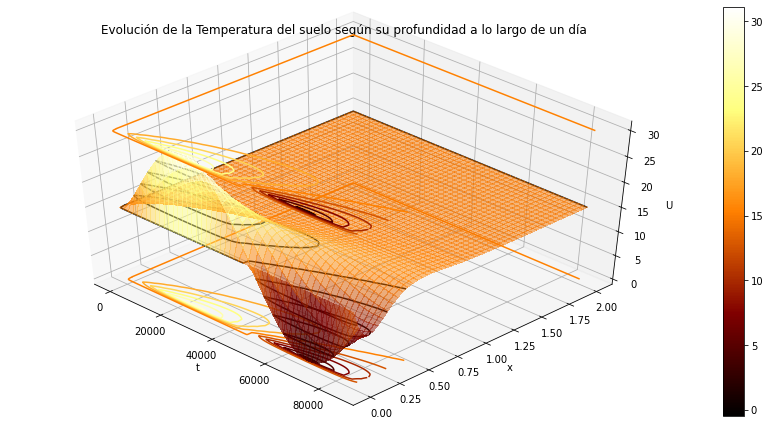

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
X = 50
T = 15001
x0 = 0
xL = 2
t0 = 0
tF = 86400
dx = ( xL - x0 )/( X - 1 )
dt = ( tF - t0 )/( T - 1 )
print( "dt/dx^2 < 0.5?", dt/dx**2)
k = 1*10**(-6)
α = k*dt/dx**2
xsteps = np.linspace( x0, xL, X )
tsteps = np.linspace( t0, tF, T )
U = np.zeros( ( X, T ) )
U[:,0] = 15*np.ones(xsteps.shape)

for j in range( 0, T - 1 ):
    t = j*dt
    U[ 0, : ] = 15 + 20.0*np.sin( 2*np.pi*t/tF )
    U[ -1, : ] = 15
    for i in range( 1, X - 1 ):
        U[ i, j+1 ] = α*U[ i - 1, j ] + ( 1 - 2*α)*U[ i, j ] + α*U[ i + 1, j ]

Temp, Xray = np.meshgrid( tsteps, xsteps )
fig = plt.figure( figsize = ( 12, 6 ) )
ax = fig.gca( projection = "3d" )
surf = ax.plot_surface( Temp, Xray, U, cmap = "afmhot",
                       linewidth = 0.01, antialiased = False, alpha = 0.5 )
ax.contour( Temp, Xray, U, 10, lw = 1, colors = "k", linestyles = "solid") 
ax.contour( Temp, Xray, U, 10, lw = 1, cmap = "afmhot", linestyles = "solid", offset = 0)
ax.contour( Temp, Xray, U, 10, lw = 1, cmap = "afmhot", linestyles = "solid", offset = 30)
m = cm.ScalarMappable( cmap = "afmhot" )
m.set_array( U )
plt.colorbar( m )
ax.set_xlabel( "t" )
ax.set_ylabel( "x" )
ax.set_zlabel( "U" )
ax.set_title( "Evolución de la Temperatura del suelo según su profundidad a lo largo de un día" )
ax.view_init( elev = 45, azim = -45 ) 
plt.tight_layout()
plt.show()